In [1]:
# ps2
import cv2
import numpy as np
import nbimporter
import util
from disparity_ssd import *

Importing Jupyter notebook from util.ipynb
Importing Jupyter notebook from disparity_ssd.ipynb


In [2]:
use_subsampling = True

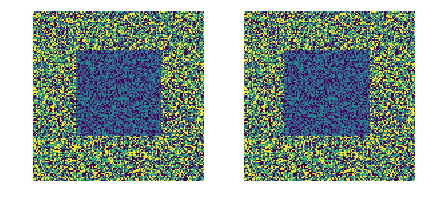

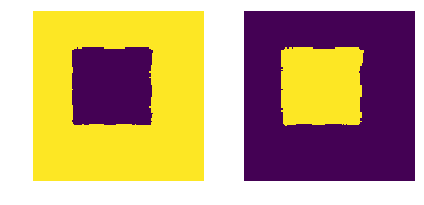

In [3]:
## 1
# Read images
L = util.read_img_gray_mode('pair0-L.png') * (1.0 / 255.0)  # grayscale, [0, 1]
R = util.read_img_gray_mode('pair0-R.png') * (1.0 / 255.0)

D_L = disparity_ssd(L, R, template_size=11)
D_R = disparity_ssd(R, L, template_size=11)

# normalize disparity maps
D_L = cv2.normalize(D_L, D_L, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
D_R = cv2.normalize(D_R, D_R, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

util.write_img('ps2-1-a-1.png', D_L)
util.write_img('ps2-1-a-2.png', D_R)

util.show_images_together(L, R)
util.show_images_together(D_L, D_R)

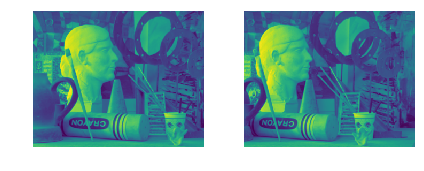

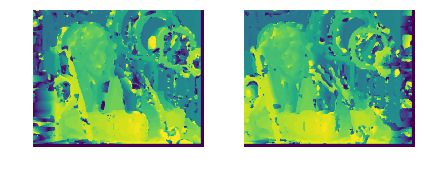

In [4]:
# 2
L = util.read_img_gray_mode('pair1-L.png')
R = util.read_img_gray_mode('pair1-R.png')
#  subsample and convert to [0,1] scale
if use_subsampling:
    L = cv2.pyrDown(L)
    R = cv2.pyrDown(R)
L = L * (1.0 / 255.0)
R = R * (1.0 / 255.0)

ts = 7; dr = 100
D_L = np.abs(disparity_ssd(L, R, template_size=ts, disparity_range=dr))
D_R = np.abs(disparity_ssd(R, L, template_size=ts, disparity_range=dr))

D_L = cv2.normalize(D_L, D_L, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
D_R = cv2.normalize(D_R, D_R, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#  revert dimensions by upsampling if previously downsampled
if use_subsampling:
    D_L = cv2.pyrUp(D_L)
    D_R = cv2.pyrUp(D_R)
util.write_img('ps2-2-a-1.png', D_L)
util.write_img('ps2-2-a-2.png', D_R)

util.show_images_together(L, R)
util.show_images_together(D_L, D_R)